In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import embed
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

rng = np.random.default_rng()
root_path =  Path("")
data_path = root_path / "data"
run = "2024-05-14-num_games_8934"
embeddings_path = data_path / "combined_clues" / run / "embeddings"

## Legacy code:
# old_clues = embed.old_load_clues(run).dropna()
# old_clues_sorter = old_clues.reset_index(drop=True).sort_values(["show_date", "show_number", "category", "clue_value"]).index
# clues = embed.load_clues(run).dropna()
# old_embeddings = np.load(embeddings_path / "old_all_embeddings.npy")
# new_embeddings = old_embeddings[old_clues_sorter]
# np.save(embeddings_path / "all_embeddings.npy", new_embeddings)

## Current code:
clues = embed.load_clues(run)
embeddings = np.load(embeddings_path / "all_embeddings.npy")

In [13]:
model = SentenceTransformer("all-MiniLM-L6-v2")
# ixs = rng.choice(embeddings.shape[0], 5, replace=False)
ixs = [0, 1, 2, 3, 4]
words = embed.prepare_clues(clues.iloc[ixs])
dates = list(clues.iloc[ixs]["show_date"])
categories = list(clues.iloc[ixs]["category"])
# words = ["musical theater", "mathematics", "hollywood", "poetry", "chess"]
vectors = model.encode(words)
affinities = util.cos_sim(vectors, embeddings)

In [14]:
np.allclose(embeddings[ixs] , vectors)

True

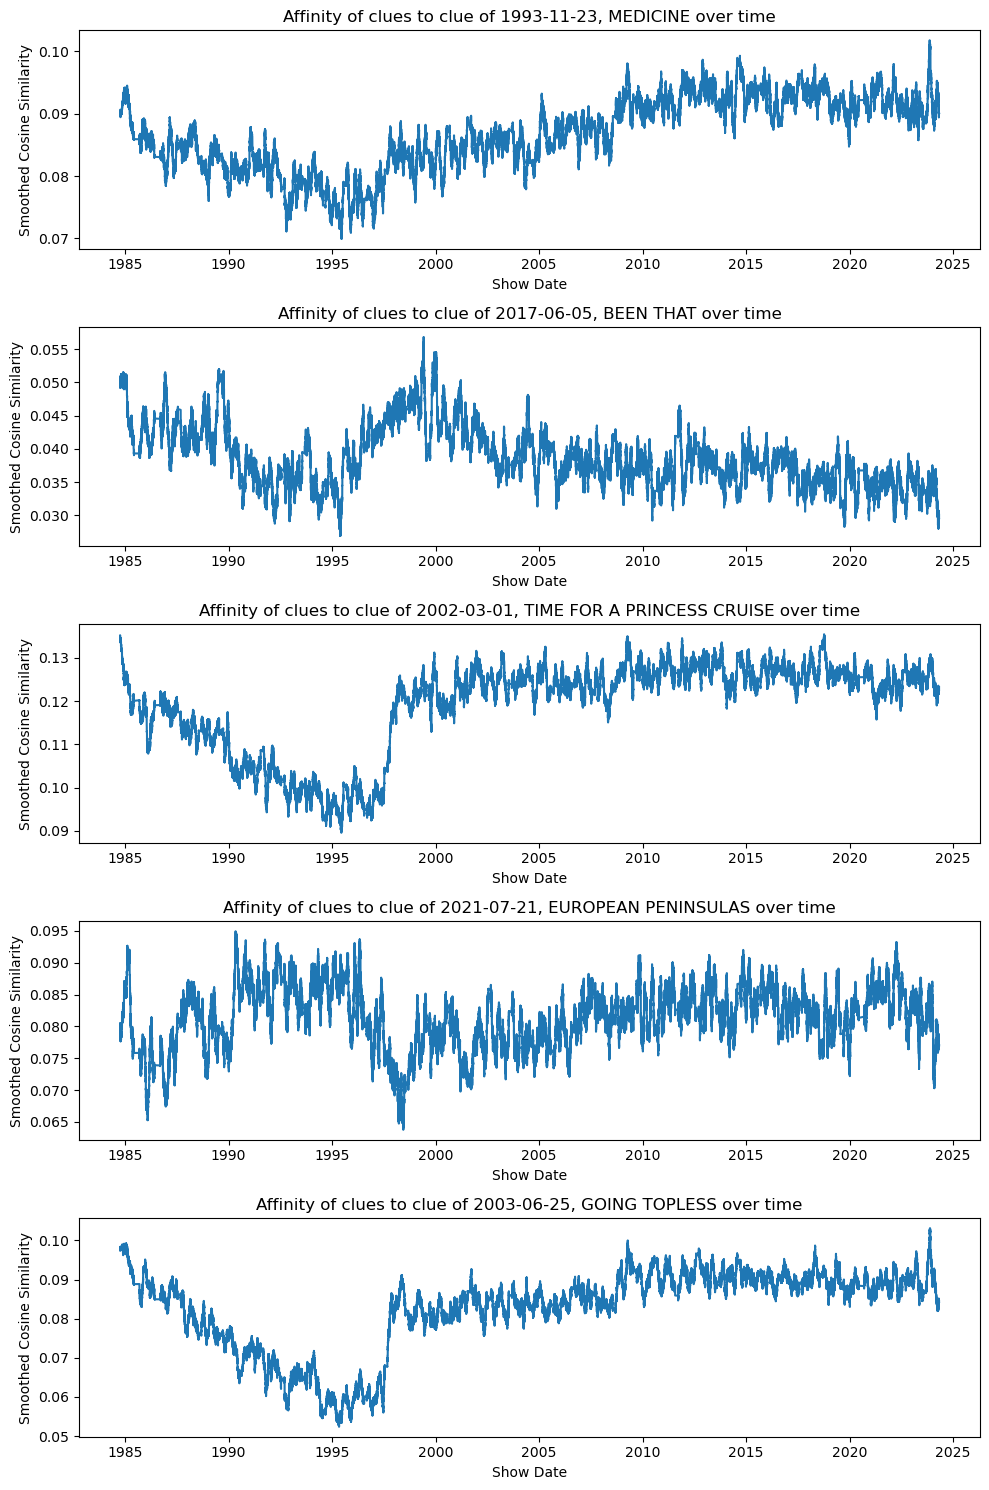

In [5]:
# affinities = new_embeddings @ vector
affinities = util.cos_sim(embeddings, vectors)
# rolling average of affinities:
window = 2000
first_half_window = window // 2
second_half_window = window - first_half_window
smoothed_affinities = [
    np.convolve(affinity, np.ones(window) / window, mode="valid")
    for affinity in affinities.T
]
n_cols = 1
n_rows = len(words)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.plot(
        clues.iloc[first_half_window-1 : -second_half_window]["show_date"],
        smoothed_affinities[i],
    )
    ax.set(
        title=f"Affinity of clues to clue of {dates[i].strftime('%Y-%m-%d')}, {categories[i]} over time",
        ylabel=f"Smoothed Cosine Similarity",
        xlabel="Show Date",
    )
plt.tight_layout()

In [6]:
words = ["musical theater", "mathematics", "hollywood", "poetry", "chess"]
vectors = model.encode(words)
affinities = util.cos_sim(vectors, embeddings)
first_half_window = window // 2
second_half_window = window - first_half_window
smoothed_affinities = [
    np.convolve(affinity, np.ones(window) / window, mode="valid")
    for affinity in affinities.T
]
n_cols = 1
n_rows = len(words)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.plot(clues.iloc[first_half_window-1:-second_half_window]["show_date"], smoothed_affinities[i])
    ax.set(title=f"Affinity of clues to {words[i]} over time", ylabel=f"Smoothed Cosine Similarity", xlabel="Show Date")
plt.tight_layout()

: 

In [ ]:
i = words.index("mathematics")
k = 10
top_k = np.argsort(affinities[i])[-k:]

NameError: name 'words' is not defined

In [85]:
clues_array = np.array(clues.assign(show_date=lambda x: x["show_date"].dt.strftime("%Y-%m-%d")))
# np.save(data_path / "combined_clues" / run / "clues.npy" , [])